In [2]:
from json import loads
from collections import Counter
import matplotlib.pyplot as plt


In [3]:
POST_PATH = "Post_Analysis.json"

In [4]:
ner = []
per = []
org = []
misc = []
loc = []
with open(POST_PATH, 'r') as post_file:
    for line in post_file:
        post = loads(line)

        for l in post["ner"].keys():
            if l == "PER":
                ner = ner + post["ner"][l]
                per = per + post["ner"][l]
            elif l == "ORG":
                ner = ner + post["ner"][l]
                org = org + post["ner"][l]
            elif l == "MISC":
                ner = ner + post["ner"][l]
                misc = misc + post["ner"][l]
            elif l == "LOC":
                ner = ner + post["ner"][l]
                loc = loc + post["ner"][l]
            else:
                print(l)


# Ner


In [5]:
print(len(set(ner)))
print(len(set(per)))
print(len(set(org)))
print(len(set(misc)))
print(len(set(loc)))


7377
1514
1067
3611
1435


In [6]:
common_elements = set(per).intersection(set(loc))
print(common_elements)

{'Redentor', 'Noviazgo', 'México.', 'Ti', 'Ellos', 'Misoprostol', 'Ven', 'Adán', 'Aprovecho', 'Amén', 'Aborto', 'Matrimonio', 'Tristeza', 'Cuaresma', 'Obispo', 'andan', 'Madre', 'Huancayo', '🇻', 'Recuerda', 'Santísima Virgen María', 'Mañana', 'Mifegymiso', 'San Cristóbal', 'San José', 'Síndrome de Down', 'Cafarnaún', 'Juan', 'Bolsonaro', 'Evangelios', 'Coronilla', 'Conéctate', 'Trump', 'Derechos Humanos', 'Domingo', 'Gutiérrez', 'Spei Mater', 'Padre', 'Junio', 'Bebé', 'Celebramos', 'Down', 'Santiago', 'Quién', 'Mamá', 'Dr', 'Cristóbal Urruticoechea', 'Él', 'Maestro', 'Hermanos', 'Hch', 'Ciencias Políticas', 'Ahome', 'Espíritu Santo', 'Mujer', 'América Rangel', 'San Juan Pablo II', 'Justicia', 'Ayúdales', 'Ave María', 'Señor', 'Angelus', 'Llamamos', 'Quienes', 'Seguiremos', 'Imágenes', 'Levántate', 'Choices', 'Santa Isabel', 'Sabías', 'Santiago el Menor', 'Aquel', 'Trujillo', 'Nuestro Redentor', 'Preocupada', 'Creador', 'Cuál', 'Ferrosur', 'Mat', 'Mira', 'Contáctanos', 'Sigamos', 'Nuest

In [7]:
print(len(ner))
print(len(per))
print(len(org))
print(len(misc))
print(len(loc))


40208
5256
3445
20315
11192


In [4]:
ner_count = Counter(ner)
per_count = Counter(per)
org_count = Counter(org)
misc_count = Counter(misc)
loc_count = Counter(loc)

In [5]:
for pol, count in ner_count.most_common(10):
    print(f"{pol}: {count}")

QuintanaRoo: 1209
NoalAborto #: 957
Venezuela: 937
Colombia: 936
Argentina: 933
Brasil: 908
Mexico: 903
Nicaragua: 902
SiALaVidaQRoo #: 899
BajaCaliforniaSur: 899


In [6]:
for pol, count in per_count.most_common(10):
    print(f"{pol}: {count}")

Cristo: 432
Jesús: 406
Jesus: 270
Jesucristo: 254
Noalaborto: 207
jesus: 173
Señor: 115
María: 73
Padre: 72
Abortonuncamas: 62


In [7]:
for pol, count in org_count.most_common(10):
    print(f"{pol}: {count}")

NoAlAborto: 746
FueraCastillo: 203
RafaelLopezAliaga: 99
Iglesia: 55
VIDA: 45
NadieMenos: 40
SI SI SI A LA: 38
ProyectoAngel: 33
ABORTO: 32
IglesiaCatolica: 30


In [17]:
for pol, count in misc_count.most_common(11):
    print(f"{pol}: {count}")

QuintanaRoo: 1209
NoalAborto #: 957
SiALaVidaQRoo #: 899
BajaCaliforniaSur: 899
Follow #: 877
Dios: 822
nofueley #feminazi #: 520
️: 510
RenovacionPopular: 377
NoalComunismo #: 375
NuevoOrdenMundial #Noalnuevoordenmundial: 368


In [9]:
for pol, count in loc_count.most_common(10):
    print(f"{pol}: {count}")

Venezuela: 937
Colombia: 936
Argentina: 933
Brasil: 908
Mexico: 903
Nicaragua: 902
Perú: 401
Peru: 387
VacanciaPedroCastillo: 279
mexico: 234


# PIECHARTs con %

In [7]:
ner_count.keys()

NameError: name 'ner_count' is not defined

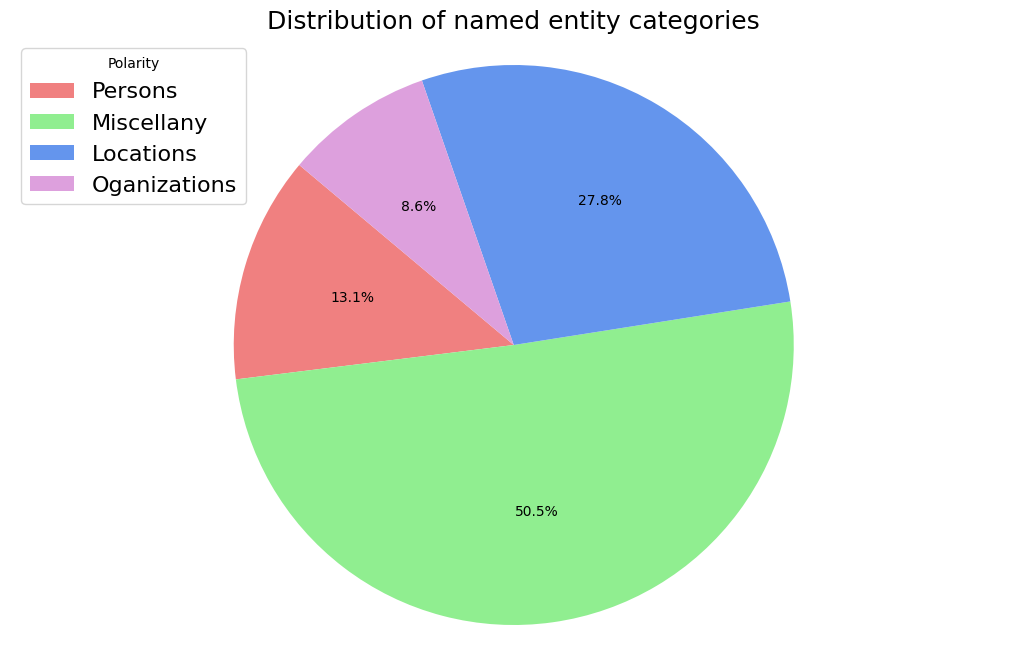

In [12]:
labels = ["Persons", "Miscellany", "Locations", "Oganizations"]#ner_count.keys()
counts = [len(per), len(misc), len(loc), len(org)]#ner_count.values()
colors = ['lightcoral', 'lightgreen', 'cornflowerblue', 'plum'] 

# Create the pie chart
plt.figure(figsize=(13, 8))
plt.pie(counts, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Distribution of named entity categories",fontsize=18)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.legend(labels, title="Polarity", loc="upper left",fontsize=16)
# Display the pie chart
plt.show()
